# AAGB - TME 3 - Algorithme de Sankoff

## 1. Introduction

In [21]:
import pandas as pd
import itertools as it
import numpy as np
from ete3 import Tree
import math

### 1 Problème : Phylogénie Pokémon

In [22]:
StepMatrix = [[0, 3, 4, 9],
              [3, 0, 2, 4],
              [4, 2, 0, 4],
              [9, 4, 4, 0]]

## ordre A C G T
dic={'Probopass':np.array([0,np.inf,np.inf,np.inf]),
          'Aggron':np.array([np.inf,np.inf,np.inf,0]),
          'Bastiodon':np.array([np.inf,np.inf,np.inf,0]),
          'Regirock':np.array([np.inf,np.inf,0,np.inf]),
          'Registeel':np.array([np.inf,np.inf,0,np.inf]),
          'Regice':np.array([np.inf,np.inf,0,np.inf]),
          'Klingklang':np.array([np.inf,np.inf,0,np.inf]),
          'Metagross':np.array([np.inf,0,np.inf,np.inf]),
          'Genesect':np.array([0,np.inf,np.inf,np.inf]),
          'Porygon=Z':np.array([np.inf,0,np.inf,np.inf]),
          'Magnezone':np.array([np.inf,0,np.inf,np.inf]),
          'Forretress':np.array([np.inf,np.inf,np.inf,0]),
          'Electrode':np.array([0,np.inf,np.inf,np.inf]),
          'Ferrothorn':np.array([np.inf,np.inf,0,np.inf]),
          }

N1 = "(((( Electrode , Magnezone) ,Porygon=Z) , (((( Aggron , Bastiodon ) , Forretress ) , Ferrothorn ) , ((((( Regirock , Regice ) , Registeel ) , Metagross ) , Klingklang ) , Genesect ))) , Probopass );"
N2 = "((((( Regirock , Regice ) , Registeel ) , (( Metagross , Klingklang ) , Genesect )) , ((( Aggron , Bastiodon ) ,( Forretress , Ferrothorn )) , Probopass )) ,( Porygon=Z,( Magnezone , Electrode )));"


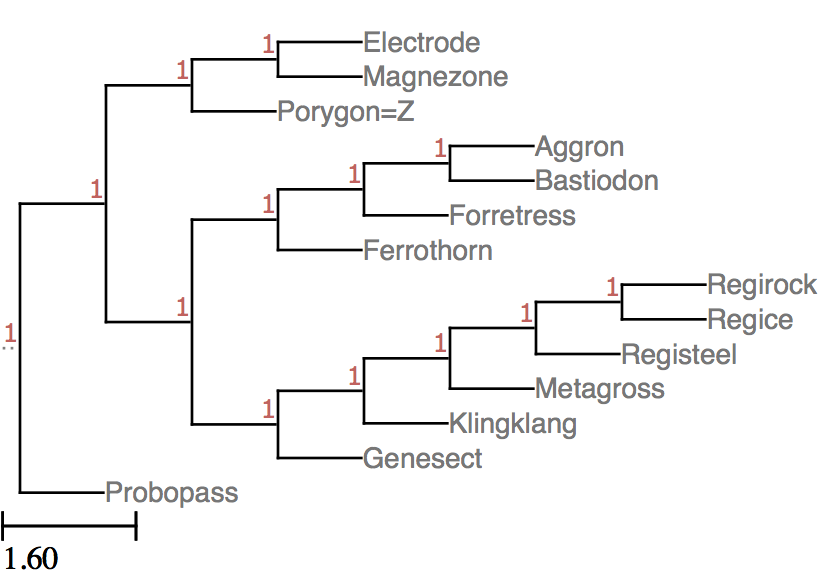

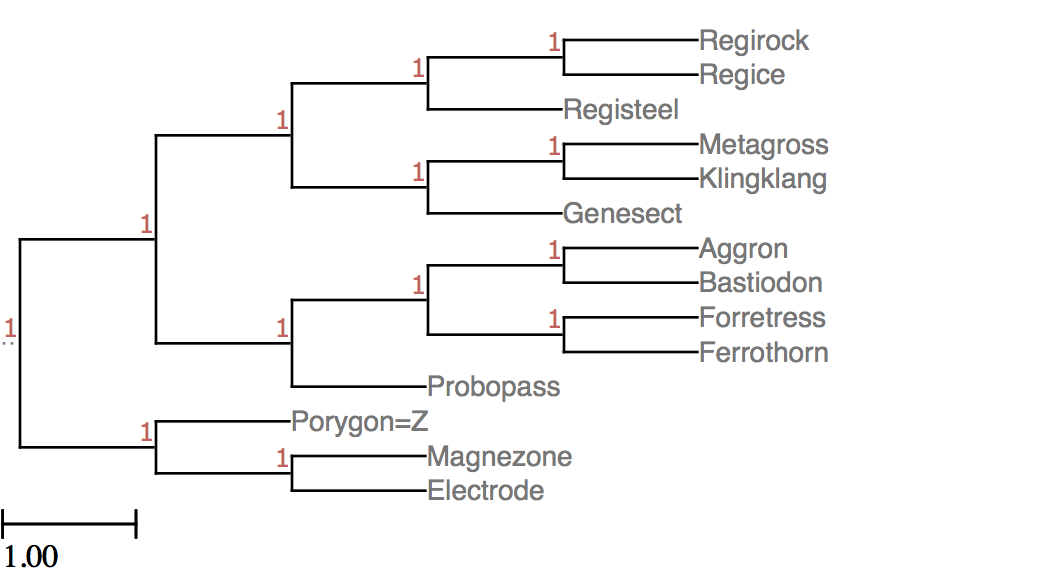

### 2.1 Visualisation des arbres

In [28]:
N1_tree_original = Tree(N1)
N2_tree_original = Tree(N2)
print(N1_tree)


            /-A (Electrode)
         /-|
      /-|   \-T (Magnezone)
     |  |
     |   \-T (Porygon=Z)
     |
     |            /-C (Aggron)
     |         /-|
     |      /-|   \-C (Bastiodon)
   /-|     |  |
  |  |   /-|   \-C (Forretress)
  |  |  |  |
  |  |  |   \-G (Ferrothorn)
  |  |  |
  |  |  |               /-G (Regirock)
  |  |  |            /-|
  |   \-|         /-|   \-G (Regice)
--|     |        |  |
  |     |      /-|   \-G (Registeel)
  |     |     |  |
  |     |   /-|   \-T (Metagross)
  |     |  |  |
  |      \-|   \-G (Klingklang)
  |        |
  |         \-A (Genesect)
  |
   \-A (Probopass)


### 2.2 Calcul des scores pour les noeuds internes

In [24]:
#L'idée est ici d'un parcours en profondeur pour parse l'arbre

"""""
# Input : index = index des nucléotides

# Fonctionnement : Revoie le nucéotide correspondant
    
# Output : Char correspondant au nucléotide

"""""

def getLetter(index):
    tab = ["A", "T", "G", "C"]
    return tab[index]

"""""
# Input : childScores = array du score des "enfants",
          t = Index de la lettre de la case à remplir du parents
            
# Fonctionnement : Applique l'algorithme de Sankoff et détermine la valeur min de ({s_i(u) + δ_i,t})
    
# Output : tuple contenant l'index de la lettre à valeur min + la valeur min

"""""
def getMinIndexed(childScores, t):
    ret = (0, childScores[0] + StepMatrix[0][t])
    for i in range(1, len(childScores)):
        tmp = (i, childScores[i] + StepMatrix[i][t])
        if tmp[1] < ret[1]:
            ret = tmp
    return ret

"""""
# Input : child1 = noeud du premier child,
          child2 = noeud du second child
            
# Fonctionnement : Renomme le nom parents et
                   Calcul le score du parents
    
# Output : tuple contenant un tableau de tuple correspondant à chaque case de score + le array de score

"""""
def calculateScores(child1, child2):
    child1.up.name = child1.name + child2.name    
    scores = np.zeros(4)
    sources = [""] * 4
    for t in range(4):
        scoresChile1 = getMinIndexed(dic1[child1.name], t)
        scoresChile2 = getMinIndexed(dic1[child2.name], t)
        sources[t] = (scoresChile1[0], scoresChile2[0])
        scores[t] = scoresChile1[1] + scoresChile2[1]
    return (sources, scores)

"""""
# Input : root = racine du noeud, démarrage donc à la raçine de l'arbre
            
# Fonctionnement : Parcours l'arbre et calcul le score des noeuds et enrigstre les scores et les sources
                   permettant de les calculer.
                   Parcours en profondeur
    
# Output : rien, effet de bord

"""""
def browseTree(root):
    child1 = root.get_children()[0]
    child2 = root.get_children()[1]
    if not child1.name:
        browseTree(child1)
    if not child2.name:
        browseTree(child2)
    (sources, scores) = calculateScores(child1, child2)
    sourcesDict[root.name] = sources
    dic1[root.name] = scores

### 2.3 Traceback

In [25]:
"""""
# Input : root = racine de l'arbre
            
# Fonctionnement : Parcours l'arbre et determine le score minimal, les index des children
                    permettant de l'avoir contruit puis itère sur ces children, spécifique à la raçine
    
# Output : effet de bord, ça modifie l'arbre

"""""
def tracebackTree(root):
    index = np.argmin(dic1[root.name])
    root.name = getLetter(index)
    tracebackTreeBis(root.get_children()[0], index)
    tracebackTreeBis(root.get_children()[1], index)

    """""
# Input : node = noeud,
          index = index du nucléotide
            
# Fonctionnement : Parcours l'arbre et determine le score minimal, les index des children
                   permettant de l'avoir contruit puis itère sur ces children, spécifique au noeuds hors raçine
                   s'arrête sur les feuilles
    
# Output : effet de bord, ça modifie l'arbre

"""""
def tracebackTreeBis(node, index):
    if node.is_leaf():
        node.name = getLetter(index) + " (" + node.name + ")"
        return
    (letterChild1, letterChild2) = sourcesDict[node.name][index]
    node.name = getLetter(index)
    tracebackTreeBis(node.get_children()[0], letterChild1)
    tracebackTreeBis(node.get_children()[1], letterChild2)

### 2.4 Verdict

In [34]:
#Initialisation
#A cause des effets de bords, on créé des copies
dic1 = dic.copy()
sourcesDict = {}
N1_tree = N1_tree_original.copy()

browseTree(N1_tree.get_tree_root())
print("Parcimonie de l'arbre N1 = " + str(min(dic1[N1_tree.get_tree_root().name])))
tracebackTree(N1_tree.get_tree_root())
print("\n Arbre étiqueté : \n", N1_tree.get_ascii(show_internal=True), "\n")

#Initialisation
#A cause des effets de bords, on créé des copies
dic1 = dic.copy()
sourcesDict = {}
N2_tree = N2_tree_original.copy()

browseTree(N2_tree.get_tree_root())
print("Parcimonie de l'arbre N2 = " + str(min(dic1[N2_tree.get_tree_root().name])))
tracebackTree(N2_tree.get_tree_root())
print("\n Arbre étiqueté : \n", N2_tree.get_ascii(show_internal=True))

Parcimonie de l'arbre N1 = 18.0

 Arbre étiqueté : 
 
            /-A (Electrode)
         /A|
      /A|   \-T (Magnezone)
     |  |
     |   \-T (Porygon=Z)
     |
     |            /-C (Aggron)
     |         /C|
     |      /C|   \-C (Bastiodon)
   /A|     |  |
  |  |   /G|   \-C (Forretress)
  |  |  |  |
  |  |  |   \-G (Ferrothorn)
  |  |  |
  |  |  |               /-G (Regirock)
  |  |  |            /G|
  |   \A|         /G|   \-G (Regice)
-A|     |        |  |
  |     |      /G|   \-G (Registeel)
  |     |     |  |
  |     |   /G|   \-T (Metagross)
  |     |  |  |
  |      \A|   \-G (Klingklang)
  |        |
  |         \-A (Genesect)
  |
   \-A (Probopass) 

Parcimonie de l'arbre N2 = 21.0

 Arbre étiqueté : 
 
               /-G (Regirock)
            /G|
         /G|   \-G (Regice)
        |  |
        |   \-G (Registeel)
      /T|
     |  |      /-T (Metagross)
     |  |   /T|
     |   \T|   \-G (Klingklang)
     |     |
     |      \-A (Genesect)
   /T|
  |  |         /-C (

#### L'arbre N1 est le mieux selon l'algorithme de Sankoff avec un score de parcimonie de 18 inférieur à 21 de l'arbre N2